In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data_input/AutoInsurance.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# EDA (Exploratory Data Analysis) & Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [11]:
df['State'].value_counts()

State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

In [12]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

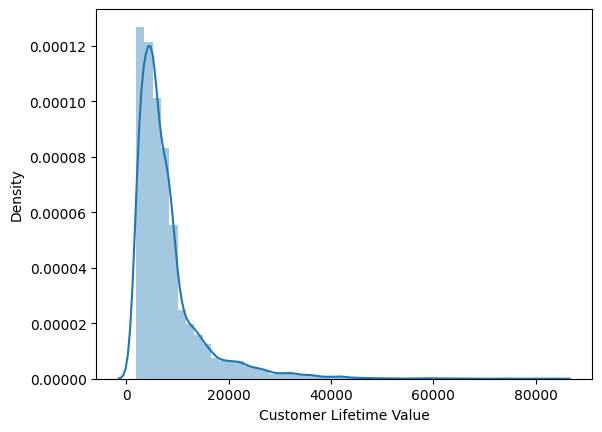

In [13]:
# look customer lifetime value distribution

sns.distplot(df['Customer Lifetime Value'])
plt.show()


By looking briefly at the distribution also the values in Customer Lifetime Value, i can point it out that its not distributed normally rather its **positivly skewed**.

Based on google about clv
**Customer lifetime value** is the total worth to a business of a customer over the whole period of their relationship with the brand. Rather than looking at the value of individual transactions, this value takes into account all potential transactions to be made during a customer relationship timespan and calculates the specific revenue from that customer.

- so the bigger the clv = the better it becomes to company.

[image_reference](https://www.qualtrics.com/m/assets/au/wp-content/uploads/2023/05/CLV_Table.webp)

In [15]:
# look at response. How many people responded to the campaign? op
# actually we can drop this column as well

# df['Response'].unique()
df['Response'].value_counts()

Response
No     7826
Yes    1308
Name: count, dtype: int64

In [46]:
df['Coverage'].value_counts()

Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

In [5]:
df['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [14]:
df['Education'].value_counts()

Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

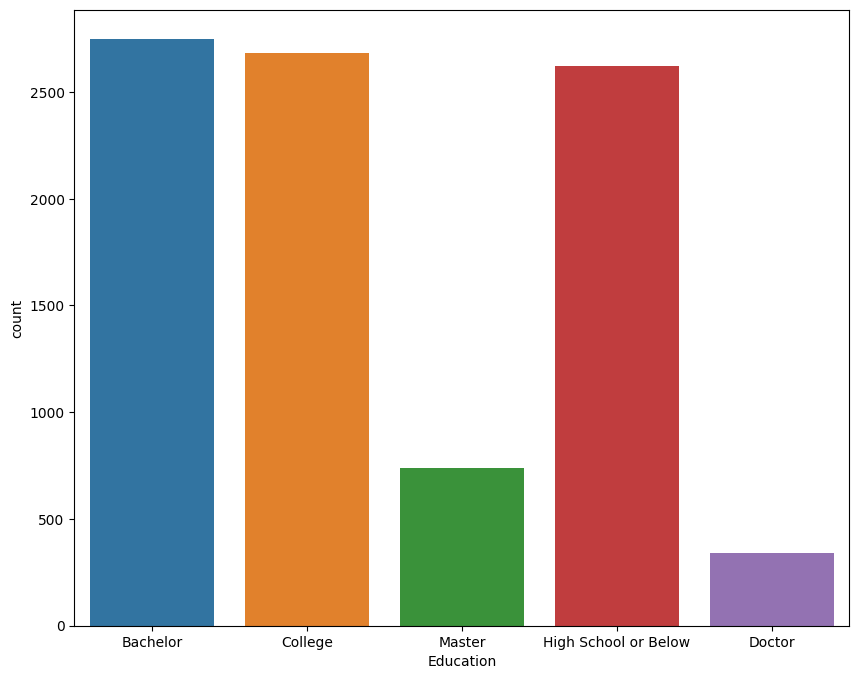

In [9]:
# find how many values in education by look at the plot

plt.figure(figsize=(10, 8))
sns.countplot(x='Education', data=df)
plt.show()


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [17]:
# so this date column is object type, we need to convert it to datetime

df['Effective To Date'] = df['Effective To Date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer Lifetime Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location Code                  9134 non-null   object        
 11  Marital Status   

In [19]:
# find the lowest and highest date. From the output we know that the data is from 2011-01-01 to 2011-12-02. 
# So it is a year data

x = df['Effective To Date'].min()
y = df['Effective To Date'].max()

print(x)
print(y)

2011-01-01 00:00:00
2011-12-02 00:00:00


In [20]:
# find if theres the date that has the most customer

df['Effective To Date'].value_counts()


Effective To Date
2011-10-01    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-31    178
2011-03-01    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-05-01    167
2011-02-27    167
2011-11-01    166
2011-04-02    164
2011-10-02    161
2011-02-28    161
2011-02-01    160
2011-01-21    160
2011-01-29    160
2011-02-22    158
2011-05-02    158
2011-03-02    158
2011-07-02    157
2011-12-02    156
2011-01-23    155
2011-01-02    154
2011-01-18    154
2011-01-15    153
2011-01-14    152
2011-11-02    151
2011-07-01    151
2011-01-25    151
2011-02-25    149
2011-08-01    149
2011-02-18    149
2011-02-02    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-09-01    146
2011-01-30    145
2011-01-13    145
2011-06-02    144
2011-06-01    143
2011-02-23    143
2011-01-16    142
2011-02-16    139
2011-02-13    139
2011-02-24    139
2011-09-02    137
2011-02-17    136
2011-01-22    136
2011-08-02

In [23]:
df['EmploymentStatus'].value_counts()

EmploymentStatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

In [25]:
df['Gender'].value_counts()

Gender
F    4658
M    4476
Name: count, dtype: int64

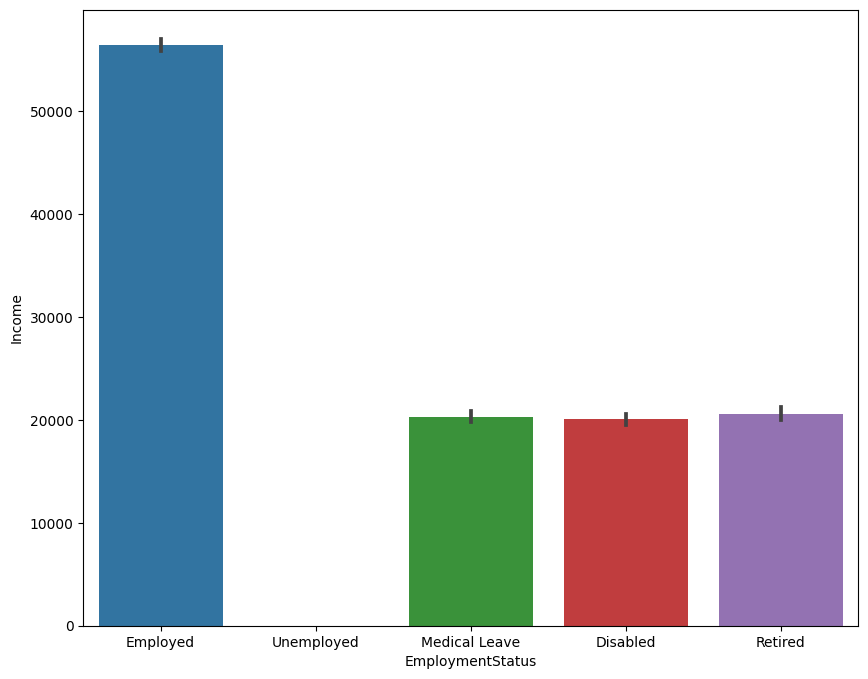

In [26]:
# make a plot for the income and employment status

plt.figure(figsize=(10, 8))
sns.barplot(x='EmploymentStatus', y='Income', data=df)
plt.show()


In [27]:
# Location Code 

df['Location Code'].value_counts()

Location Code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64

- suburban - pinggiran kota 
- rural - pedesaan
- urban - perkotaan

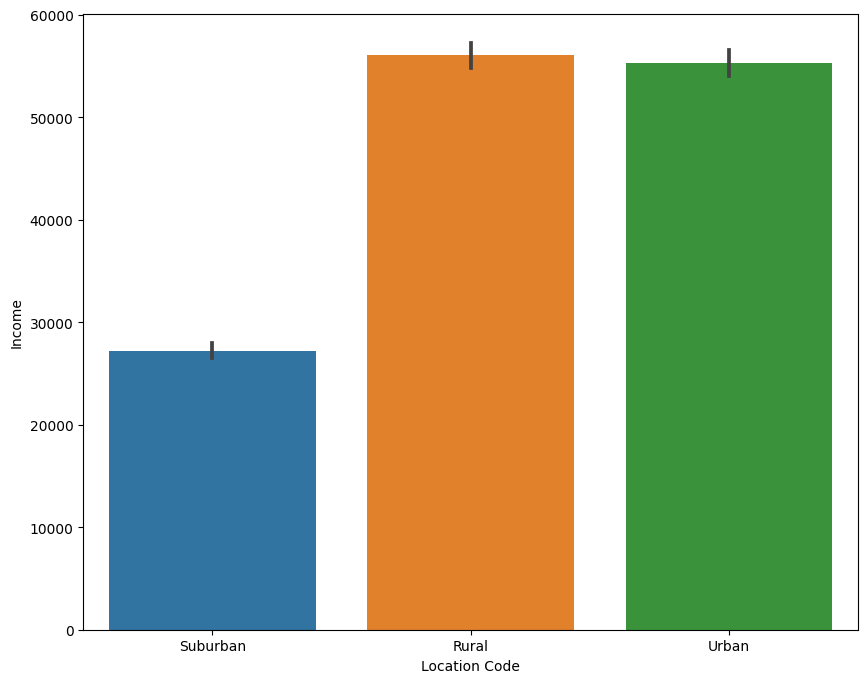

In [29]:
# make a plot for the location code and income

plt.figure(figsize=(10, 8))
sns.barplot(x='Location Code', y='Income', data=df)
plt.show()

In [30]:
df['Policy Type'].value_counts()

Policy Type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: count, dtype: int64

i have no idea this three type function will do in this dataset.  theres a policy type and policy? i'll try to drop this columns as well the **monthly premium auto till number of policies**

In [31]:
df['Policy'].value_counts()

Policy
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: count, dtype: int64

In [32]:
df['Renew Offer Type'].value_counts()

Renew Offer Type
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: count, dtype: int64

In [33]:
df['Sales Channel'].value_counts()

Sales Channel
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: count, dtype: int64

so does this channel contribution tell on how getting the customer for the first time? or does it just tell that the customer will contacting this channel only? Either way i believe it has no future impact **i guess**

In [35]:
df['Total Claim Amount'].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: Total Claim Amount, dtype: float64

the min value is kinda interesting, lets take a look.

### anyway this is the definition for the total claimed amount

**Total Claim Amount** means the total of all Customer charges for equipment, labor, consumables, administrative costs, processing costs and other costs outlined, defined, and/or authorized by Customer's jurisdictional law, code, resolution or ordinance, as set forth on Customer reimbursement cost schedule.

TL;DR : The sum payable at the maturity of an insurance policy or upon death of the person insured or any other possible scenario

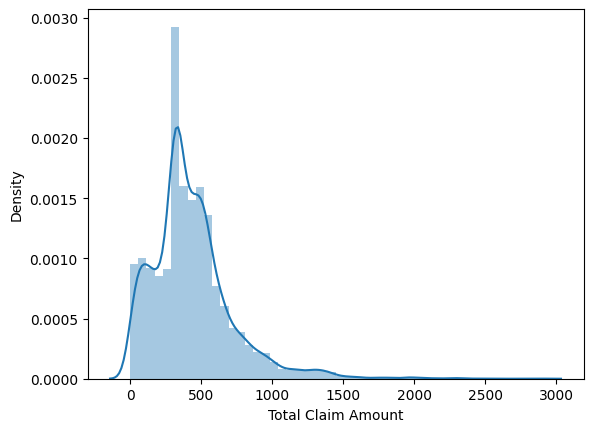

In [36]:
# take a look at the distribution of total claim amount 

sns.distplot(df['Total Claim Amount'])
plt.show()

In [38]:
# take a look at min and max of total claim amount

x = df['Total Claim Amount'].min()
y = df['Total Claim Amount'].max()

print(x)
print(y)

0.099007
2893.239678


In [42]:
# find the rows where total claim amount is 0.099007

df[df['Total Claim Amount'] == 0.099007]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
2334,EY74093,Nevada,5004.135361,No,Basic,High School or Below,2011-02-21,Employed,M,86834,...,93,0,8,Corporate Auto,Corporate L1,Offer4,Agent,0.099007,Four-Door Car,Medsize


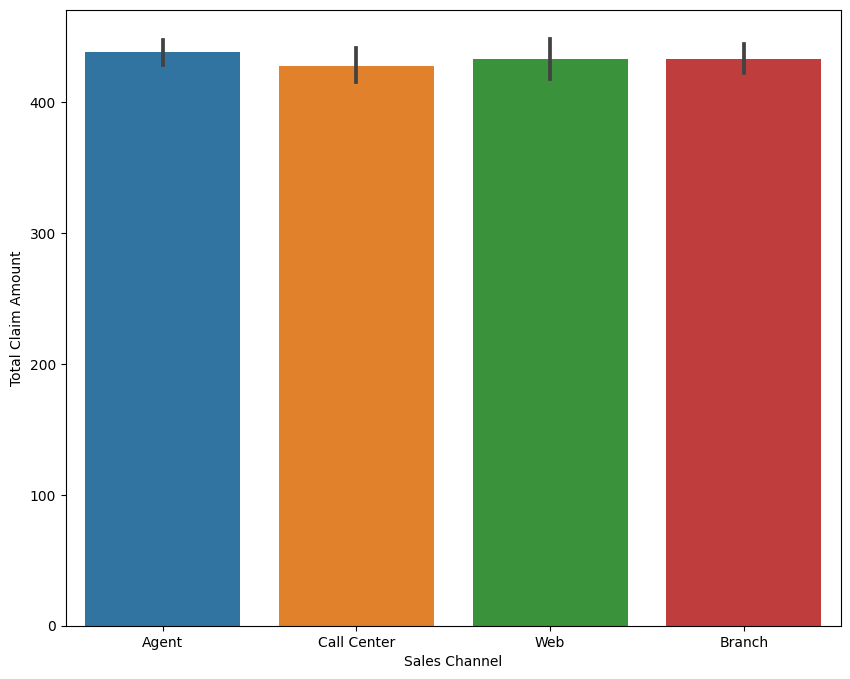

In [34]:
# plot for total claim amount and sales channel

plt.figure(figsize=(10, 8))
sns.barplot(x='Sales Channel', y='Total Claim Amount', data=df)
plt.show()

In [43]:
# look at vehicle class

df['Vehicle Class'].value_counts()


Vehicle Class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: count, dtype: int64

In [44]:
# look at vehicle size

df['Vehicle Size'].value_counts()

Vehicle Size
Medsize    6424
Small      1764
Large       946
Name: count, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer Lifetime Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location Code                  9134 non-null   object        
 11  Marital Status   

In [51]:
# okay now we have to deal with the categorical data. We can use one hot encoding for this
# first we need to copy the data to make sure we dont change the original data

df_copy = df.copy()

In [52]:
# drop the customer, effective to date, response column

df_copy = df_copy.drop(['Customer', 'Effective To Date', 'Response'], axis=1)

In [53]:
df_copy.head()

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,Basic,Bachelor,Employed,M,43836,Rural,Single,73,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [54]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Coverage                       9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   EmploymentStatus               9134 non-null   object 
 5   Gender                         9134 non-null   object 
 6   Income                         9134 non-null   int64  
 7   Location Code                  9134 non-null   object 
 8   Marital Status                 9134 non-null   object 
 9   Monthly Premium Auto           9134 non-null   int64  
 10  Months Since Last Claim        9134 non-null   int64  
 11  Months Since Policy Inception  9134 non-null   int64  
 12  Number of Open Complaints      9134 non-null   i

In [55]:
# i need to convert the object type to category type

df_copy['State'] = df_copy['State'].astype('category')
df_copy['Coverage'] = df_copy['Coverage'].astype('category')
df_copy['Education'] = df_copy['Education'].astype('category')
df_copy['EmploymentStatus'] = df_copy['EmploymentStatus'].astype('category')
df_copy['Gender'] = df_copy['Gender'].astype('category')
df_copy['Location Code'] = df_copy['Location Code'].astype('category')
df_copy['Marital Status'] = df_copy['Marital Status'].astype('category')
df_copy['Policy Type'] = df_copy['Policy Type'].astype('category')
df_copy['Policy'] = df_copy['Policy'].astype('category')
df_copy['Renew Offer Type'] = df_copy['Renew Offer Type'].astype('category')
df_copy['Sales Channel'] = df_copy['Sales Channel'].astype('category')
df_copy['Vehicle Class'] = df_copy['Vehicle Class'].astype('category')
df_copy['Vehicle Size'] = df_copy['Vehicle Size'].astype('category')


In [56]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   State                          9134 non-null   category
 1   Customer Lifetime Value        9134 non-null   float64 
 2   Coverage                       9134 non-null   category
 3   Education                      9134 non-null   category
 4   EmploymentStatus               9134 non-null   category
 5   Gender                         9134 non-null   category
 6   Income                         9134 non-null   int64   
 7   Location Code                  9134 non-null   category
 8   Marital Status                 9134 non-null   category
 9   Monthly Premium Auto           9134 non-null   int64   
 10  Months Since Last Claim        9134 non-null   int64   
 11  Months Since Policy Inception  9134 non-null   int64   
 12  Number of Open Complaints      913

In [57]:
# use one hot encoding for the categorical data

df_clean = pd.get_dummies(df_copy, drop_first=True)
df_clean.head()


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,False,False,...,False,False,False,False,False,False,False,True,True,False
1,6979.535903,0,94,13,42,0,8,1131.464935,False,False,...,False,False,False,False,False,False,False,False,True,False
2,12887.431650,48767,108,18,38,0,2,566.472247,False,True,...,False,False,False,False,False,False,False,True,True,False
3,7645.861827,0,106,18,65,0,7,529.881344,True,False,...,False,True,False,False,False,True,False,False,True,False
4,2813.692575,43836,73,12,44,0,1,138.130879,False,False,...,False,False,False,False,False,False,False,False,True,False


In [58]:
# now we need to scale the data. We can use standard scaler for this

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean_scaled = scaler.fit_transform(df_clean)
df_clean_scaled = pd.DataFrame(df_clean_scaled, columns=df_clean.columns)
df_clean_scaled.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,-0.169640,-0.725537,-0.326930,...,-0.625215,-0.489405,-0.411917,-0.134795,-0.143383,-0.494726,-0.236545,1.960371,0.649504,-0.489233
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,2.400737,-0.725537,-0.326930,...,-0.625215,-0.489405,-0.411917,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,0.649504,-0.489233
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0.455734,-0.725537,3.058759,...,-0.625215,-0.489405,-0.411917,-0.134795,-0.143383,-0.494726,-0.236545,1.960371,0.649504,-0.489233
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,0.329769,1.378290,-0.326930,...,-0.625215,2.043299,-0.411917,-0.134795,-0.143383,2.021323,-0.236545,-0.510108,0.649504,-0.489233
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,-1.018843,-0.725537,-0.326930,...,-0.625215,-0.489405,-0.411917,-0.134795,-0.143383,-0.494726,-0.236545,-0.510108,0.649504,-0.489233


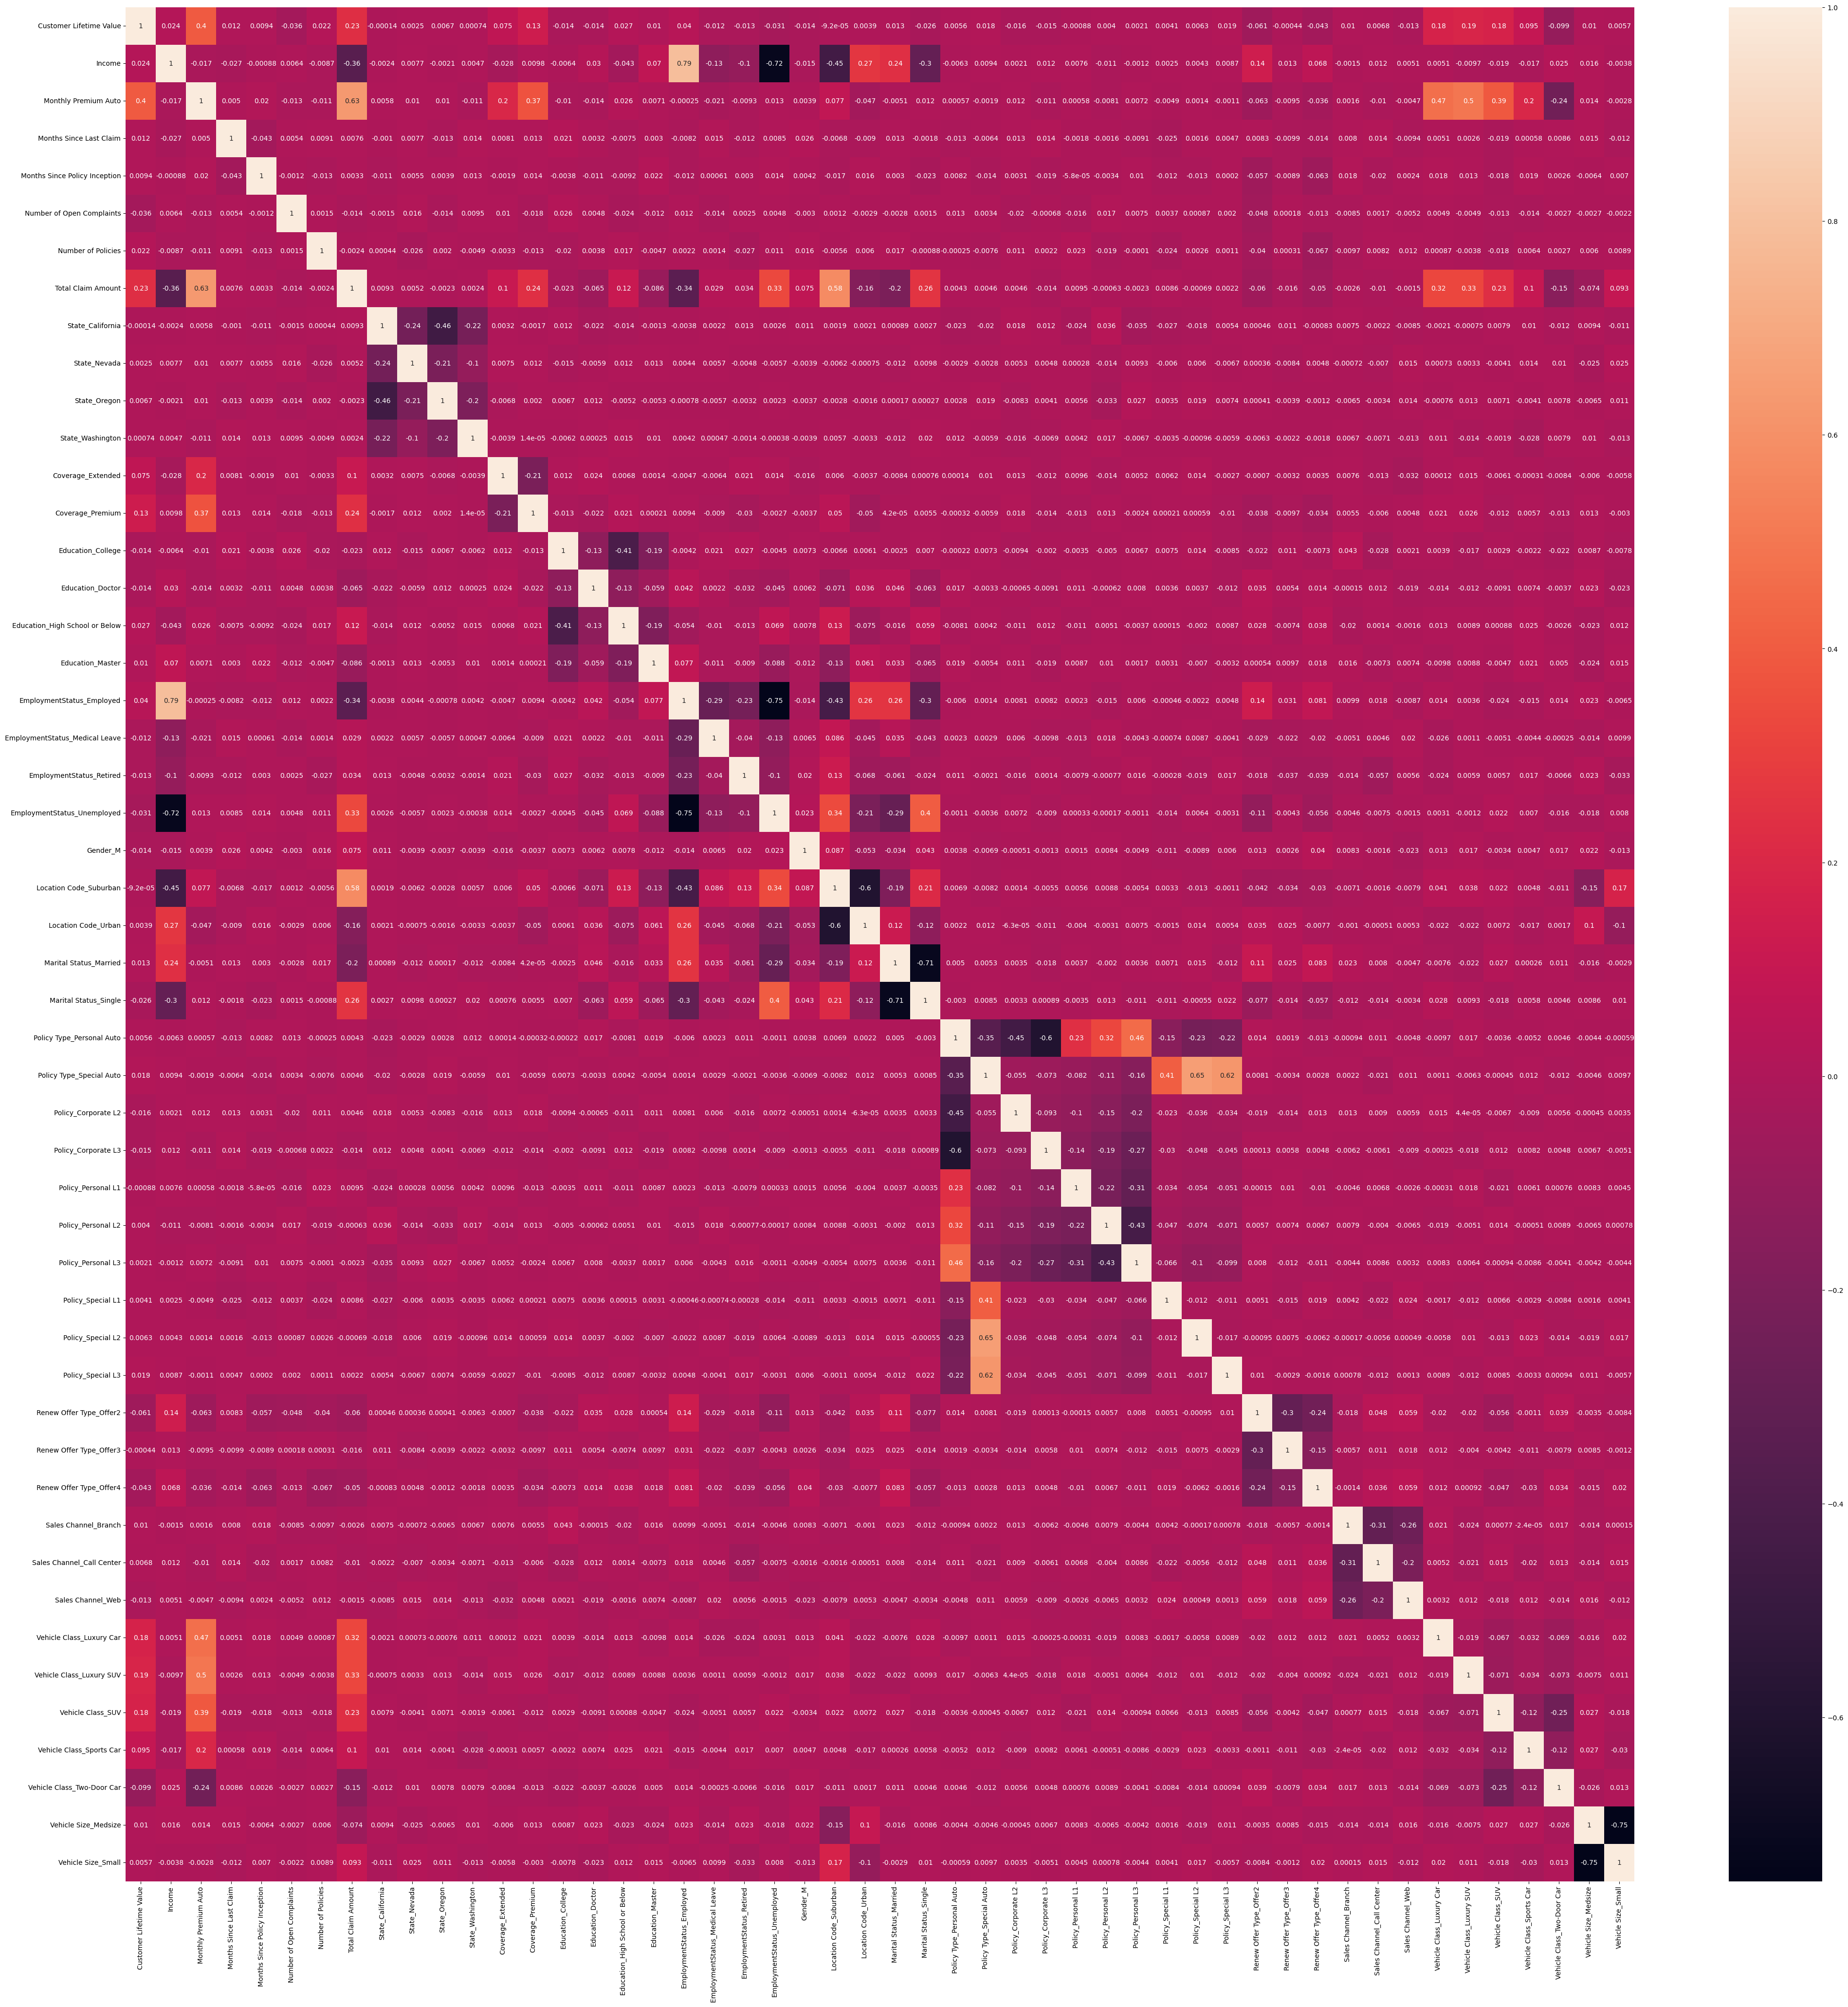

In [60]:
# find the correlation between the features

plt.figure(figsize=(50, 50))
sns.heatmap(df_clean_scaled.corr(), annot=True)
plt.show()


In [61]:
# now we need to split the data into train and test set

from sklearn.model_selection import train_test_split

X = df_clean_scaled.drop('Total Claim Amount', axis=1)
y = df_clean_scaled['Total Claim Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
# now we need to build the model. We can use linear regression for this

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# predict the test set
y_pred = model.predict(X_test)

# find the score of the model
print('Score:', model.score(X_test, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))

Score: 0.7623671424709745
RMSE: 0.47319970495763714
MAE: 0.3263746042473111


In [66]:
# Lasso Regression

from sklearn.linear_model import Lasso

model_two = Lasso(alpha=0.1)
model_two.fit(X_train, y_train)

# predict the test set
y_pred = model_two.predict(X_test)

# find the score of the model
print('Score:', model_two.score(X_test, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))

Score: 0.696990412928405
RMSE: 0.534342114541756
MAE: 0.36312154810203673


In [67]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

model_three = RandomForestRegressor()
model_three.fit(X_train, y_train)

# predict the test set
y_pred = model_three.predict(X_test)

# find the score of the model
print('Score:', model_three.score(X_test, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))

Score: 0.8242040846730072
RMSE: 0.40700112522049375
MAE: 0.25561594069375293


In [68]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

model_four = GradientBoostingRegressor()
model_four.fit(X_train, y_train)

# predict the test set
y_pred = model_four.predict(X_test)

# find the score of the model
print('Score:', model_four.score(X_test, y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))


Score: 0.8185241741161849
RMSE: 0.4135238958613621
MAE: 0.2712047942943536


In [ ]:
# now we need to do hyperparameter tuning for the random forest regressor

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300, 400, 500],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth': [4, 5, 6, 7, 8],
                'criterion': ['absolute_error', 'friedman_mse']}

grid = GridSearchCV(RandomForestRegressor(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
# print(grid.best_index_)
# print(grid.scorer_)
# print(grid.n_splits_)
# print(grid.refit_time_)
# print(grid.best_estimator_.feature_importances_)
# print(grid.best_estimator_.oob_score_)
# print(grid.best_estimator_.oob_prediction_)
